## Análisis de lluvias monocromaticas de Foton

El set de simulaciones esta compuesto por 10000 lluvias verticales de Gamma con energías entre 10 y 1000 GeV. Simuladas con una distribución espectral con $\gamma = $2.7.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import pylab
import os

In [2]:
#A partir de aquí python sabe en que carpeta se encuentran los datos
os.chdir("/home/csarmiento/Documentos/rpc_work/")
os.getcwd()

'/home/csarmiento/Documentos/rpc_work'

In [3]:
# 100 MeV
# 
df= pd.read_csv(r"rbm_10-100GeV_G/110000.pri.bz2", compression='bz2', delimiter=" ")
df.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
0,1,31.4480,-18.8236,0.0,0.0,50.0,3.0,0.0,0.0,53.0
1,1,10.0798,-19.9681,0.0,0.0,2.0,0.0,0.0,0.0,2.0
2,1,29.2619,-21.8068,0.0,0.0,30.0,8.0,0.0,0.0,38.0
3,1,12.8195,-51.5205,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,20.9725,-25.6140,0.0,0.0,12.0,1.0,0.0,0.0,13.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   prm_Crk_id   10000 non-null  int64  
 1   prm_energy   10000 non-null  float64
 2   prm_x0       10000 non-null  float64
 3   prm_theta    10000 non-null  float64
 4   prm_phi      10000 non-null  float64
 5   ph_obs_lev   10000 non-null  float64
 6   el_obs_lev   10000 non-null  float64
 7   hd_obs_lev   10000 non-null  float64
 8   mu_obs_lev   10000 non-null  float64
 9   tot_obs_lev  10000 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 781.4 KB


#### Distribución de energía de los primarios

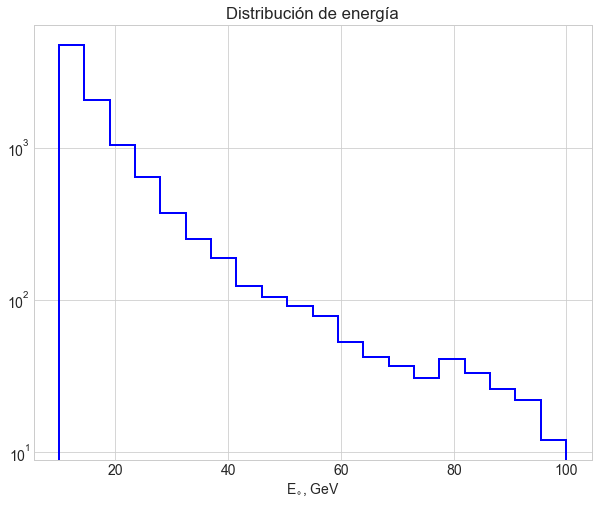

In [5]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(df["prm_energy"], bins=20, histtype='step', color="b", linewidth=2, fill=False);
#plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
pyplot.yscale('log')
plt.title("Distribución de energía")
plt.xlabel(r"E$_{\circ}$, GeV")
#plt.legend()
plt.show()

#### Punto de primera interacción

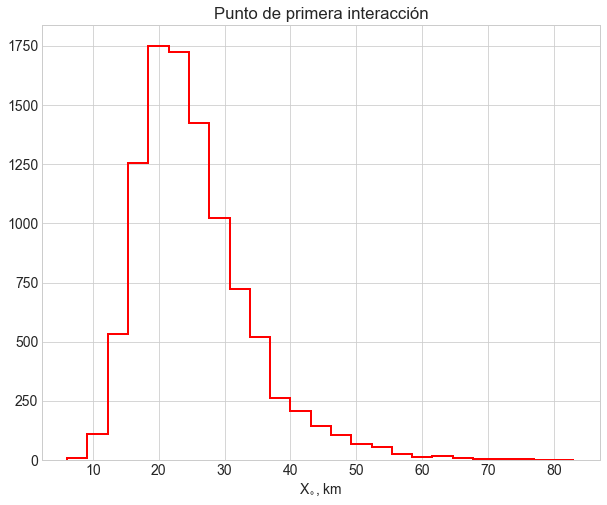

In [6]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(-df["prm_x0"], bins=25, histtype='step', color="r", linewidth=2, fill=False);
plt.title("Punto de primera interacción")
plt.xlabel(r"X$_{\circ}$, km")
#plt.legend()
plt.show()

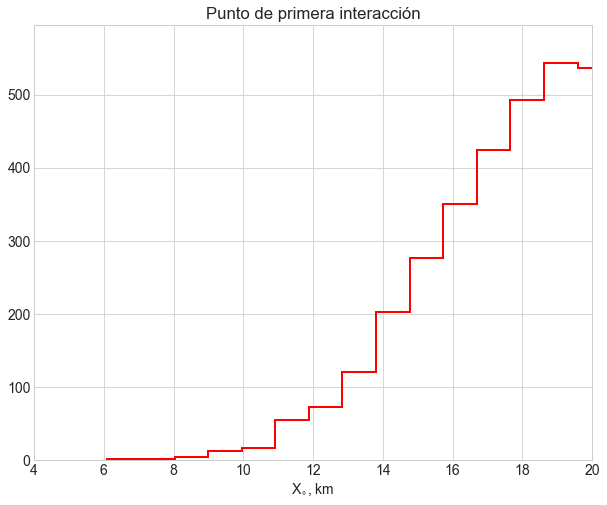

In [7]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(-df["prm_x0"], bins=80, histtype='step', color="r", linewidth=2, fill=False);
plt.title("Punto de primera interacción")
plt.xlabel(r"X$_{\circ}$, km")
plt.xlim(4, 20)
#plt.ylim(None, 10000)
#pyplot.yscale('log')
#plt.legend()
plt.show()

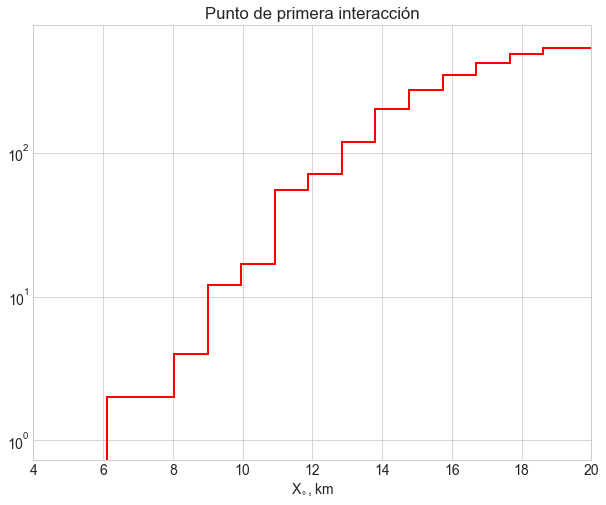

In [8]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(-df["prm_x0"], bins=80, histtype='step', color="r", linewidth=2, fill=False);
plt.title("Punto de primera interacción")
plt.xlabel(r"X$_{\circ}$, km")
plt.xlim(4, 20)
#plt.ylim(None, 10000)
pyplot.yscale('log')
#plt.legend()
plt.show()

(0.0, 100.0)

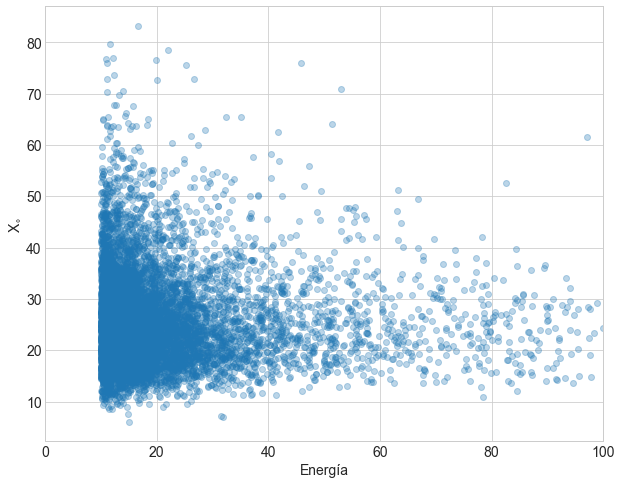

In [9]:
plt.figure(figsize=(10,8))
plt.plot(df["prm_energy"], -df["prm_x0"], 'o', alpha=0.3)
plt.xlabel("Energía")
plt.ylabel(r"X$_{\circ}$")
plt.xlim(0, 100)

(8.0, 100.0)

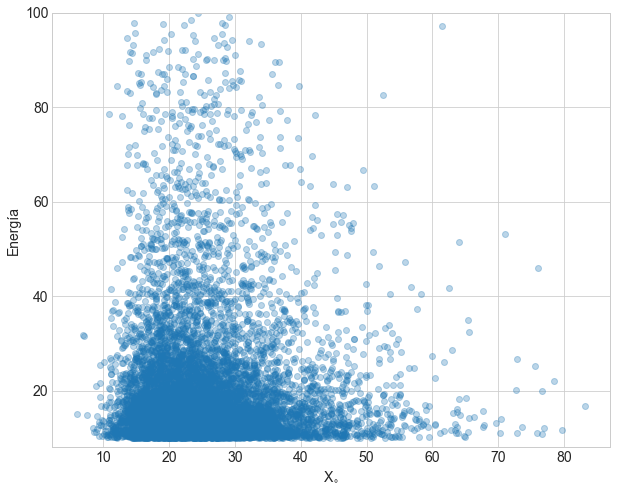

In [10]:
plt.figure(figsize=(10,8))
plt.plot(-df["prm_x0"],df["prm_energy"], 'o', alpha=0.3)
plt.ylabel("Energía")
plt.xlabel(r"X$_{\circ}$")
plt.ylim(8, 100)

###  Fotones que llegan sin interactuar

In [11]:
df_ = df[-df["prm_x0"]<=10]
df_.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
1370,1,13.4154,-9.40810,0.0,0.0,101.0,9.0,0.0,0.0,110.0
1581,1,16.8546,-9.65194,0.0,0.0,141.0,17.0,0.0,0.0,158.0
1837,1,14.8581,-7.49963,0.0,0.0,189.0,27.0,0.0,0.0,216.0
1946,1,10.3186,-9.39954,0.0,0.0,101.0,9.0,0.0,0.0,110.0
2487,1,12.8194,-9.44988,0.0,0.0,141.0,18.0,0.0,0.0,159.0


In [12]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1370 to 9581
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   prm_Crk_id   20 non-null     int64  
 1   prm_energy   20 non-null     float64
 2   prm_x0       20 non-null     float64
 3   prm_theta    20 non-null     float64
 4   prm_phi      20 non-null     float64
 5   ph_obs_lev   20 non-null     float64
 6   el_obs_lev   20 non-null     float64
 7   hd_obs_lev   20 non-null     float64
 8   mu_obs_lev   20 non-null     float64
 9   tot_obs_lev  20 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 1.7 KB


In [13]:
print(df_["prm_energy"], df_["prm_x0"], df_["tot_obs_lev"])

1370    13.4154
1581    16.8546
1837    14.8581
1946    10.3186
2487    12.8194
2501    31.8187
3443    21.6275
4173    21.0856
4413    11.3668
5517    11.8788
5913    31.5255
5965    12.0230
6349    15.0332
6642    18.6521
6900    14.5847
8093    12.8234
8364    11.2308
8764    13.9062
9347    25.4177
9581    10.5158
Name: prm_energy, dtype: float64 1370   -9.40810
1581   -9.65194
1837   -7.49963
1946   -9.39954
2487   -9.44988
2501   -6.89202
3443   -9.54938
4173   -8.97100
4413   -8.62717
5517   -9.04355
5913   -7.13313
5965   -8.48011
6349   -6.10367
6642   -9.60133
6900   -9.00805
8093   -9.73834
8364   -8.99092
8764   -9.77672
9347   -9.56866
9581   -9.80868
Name: prm_x0, dtype: float64 1370    110.0
1581    158.0
1837    216.0
1946    110.0
2487    159.0
2501    285.0
3443    228.0
4173    158.0
4413    148.0
5517    146.0
5913    301.0
5965     81.0
6349    116.0
6642    244.0
6900    178.0
8093     88.0
8364    118.0
8764    123.0
9347    266.0
9581    124.0
Name: tot_obs_lev,

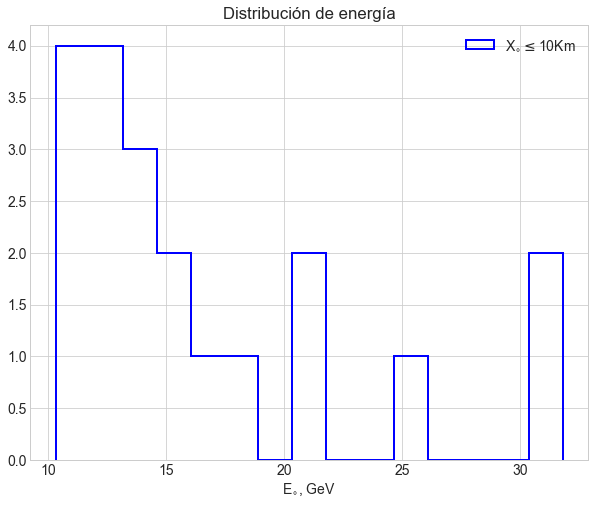

In [76]:
plt.figure(figsize=(10,8))
plt.hist(df_["prm_energy"], bins=15, histtype='step', color="b", linewidth=2, fill=False, label=r"X$_{\circ}\leq$10Km");
#plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
#pyplot.yscale('log')
plt.title("Distribución de energía")
plt.xlabel(r"E$_{\circ}$, GeV")
plt.legend()
plt.show()

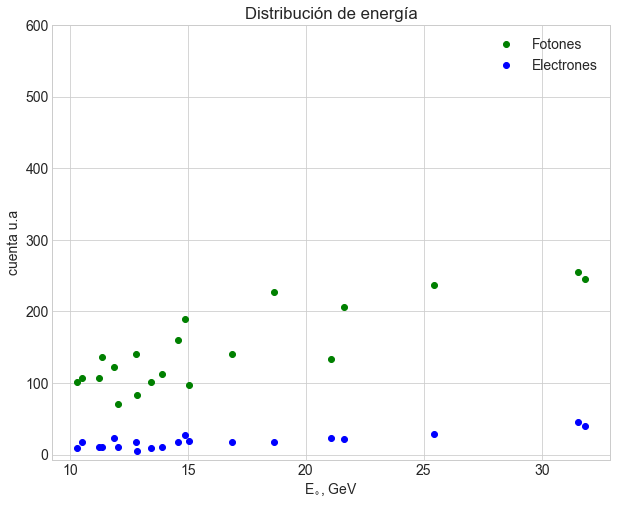

In [15]:
plt.figure(figsize=(10,8))
plt.plot(df_["prm_energy"], df_["ph_obs_lev"], 'o', color="g", linewidth=2, label="Fotones");
plt.plot(df_["prm_energy"], df_["el_obs_lev"], 'o', color="b", linewidth=2, label="Electrones");
#pyplot.yscale('log')
plt.ylim(None, 600)
plt.title("Distribución de energía")
plt.xlabel(r"E$_{\circ}$, GeV")
#plt.xlim(0, 40)
plt.ylabel("cuenta u.a")
plt.legend()
plt.show()

In [16]:
print(df_["mu_obs_lev"])

1370    0.0
1581    0.0
1837    0.0
1946    0.0
2487    0.0
2501    0.0
3443    0.0
4173    2.0
4413    0.0
5517    0.0
5913    0.0
5965    0.0
6349    0.0
6642    0.0
6900    0.0
8093    0.0
8364    0.0
8764    0.0
9347    0.0
9581    0.0
Name: mu_obs_lev, dtype: float64


In [17]:
print(df_["hd_obs_lev"])

1370    0.0
1581    0.0
1837    0.0
1946    0.0
2487    0.0
2501    0.0
3443    0.0
4173    0.0
4413    0.0
5517    0.0
5913    0.0
5965    0.0
6349    0.0
6642    0.0
6900    0.0
8093    0.0
8364    0.0
8764    0.0
9347    0.0
9581    0.0
Name: hd_obs_lev, dtype: float64


In [18]:
ds = pd.read_csv(r"rbm_10-100GeV_G/110000.sec.bz2", compression='bz2', delimiter=" ")

/home/csarmiento/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,3,4,5,7,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
ds.head()

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi
0,1,-0.000279962,-0.000620,0.000760567,2582.73,-4151.76,370778.0,1,1,31.448,0,0.0
1,1,0.00059734,0.000313,0.00466638,15494.7,13038,370609.0,1,1,31.448,0,0.0
2,1,0.000642224,-0.000569,0.0100619,10178.3,3425.48,370590.0,1,1,31.448,0,0.0
3,1,-6.42426e-05,-0.001539,0.00285677,4182.02,-30113.6,370896.0,1,1,31.448,0,0.0
4,1,-0.000337418,-0.000203,0.000461799,26625,-27536.6,370988.0,1,1,31.448,0,0.0


In [20]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222857 entries, 0 to 222856
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CorsikaId   222857 non-null  object 
 1   px          222857 non-null  object 
 2   py          222857 non-null  float64
 3   pz          222857 non-null  object 
 4   x           222857 non-null  object 
 5   y           222857 non-null  object 
 6   t           222857 non-null  float64
 7   shower_id   222857 non-null  object 
 8   prm_id      222857 non-null  object 
 9   prm_energy  222857 non-null  float64
 10  prm_theta   222857 non-null  object 
 11  prm_phi     222856 non-null  float64
dtypes: float64(4), object(8)
memory usage: 20.4+ MB


In [21]:
#Conversión de string a float de algunas variables
#
ds['CorsikaId'] = pd.to_numeric(ds['CorsikaId'],errors='coerce')
ds['shower_id'] = pd.to_numeric(ds['shower_id'],errors='coerce')
ds['x'] = pd.to_numeric(ds['x'],errors='coerce')
ds['y'] = pd.to_numeric(ds['y'],errors='coerce')

ds['px'] = pd.to_numeric(ds['px'],errors='coerce')
ds['py'] = pd.to_numeric(ds['py'],errors='coerce')
ds['pz'] = pd.to_numeric(ds['pz'],errors='coerce')

ds['x'] = ds['x']/100
ds['y'] = ds['y']/100

## Evento 1

In [32]:
ds_ = ds[ds["shower_id"]==4174]
ds_.head()

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi
89173,1.0,0.000085,-0.000250,0.000892,28.8276,-1062.3300,371118.0,4174.0,1,21.0856,0,0.0
89174,1.0,-0.007819,-0.002142,0.094376,-258.8710,319.0470,370782.0,4174.0,1,21.0856,0,0.0
89175,1.0,0.000089,0.000486,0.001320,-268.3770,67.5698,371017.0,4174.0,1,21.0856,0,0.0
89176,1.0,0.000124,-0.000815,0.005271,-189.1310,126.2720,370869.0,4174.0,1,21.0856,0,0.0
89177,1.0,-0.000056,-0.000103,0.000321,-22.6182,57.9188,371204.0,4174.0,1,21.0856,0,0.0


In [33]:
E10 = np.sqrt(ds_["px"]**2 + ds_["py"]**2 + ds_["pz"]**2)

<Figure size 720x576 with 0 Axes>

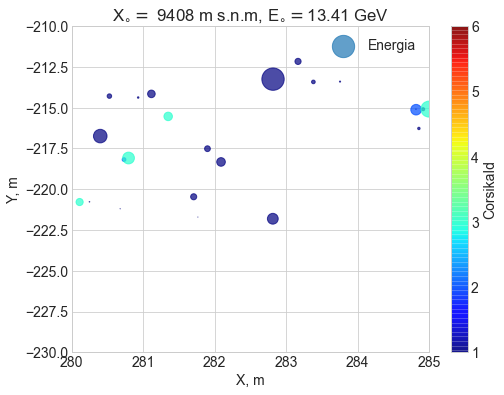

In [62]:
plt.figure(figsize=(10,8))

ds_.plot(kind="scatter", x="x", y="y", alpha=0.7,
    s=E10*500, label="Energia", figsize=(8,6),
    c="CorsikaId", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

#plt.plot(ds_["x"], ds_["y"], '.')
plt.xlabel("X, m")
plt.ylabel("Y, m")
plt.xlim(280, 285)
plt.ylim(-230,-210)
plt.title(r"X$_{\circ}=$ 9408 m s.n.m, E$_{\circ}=$13.41 GeV")
plt.legend()
plt.show()

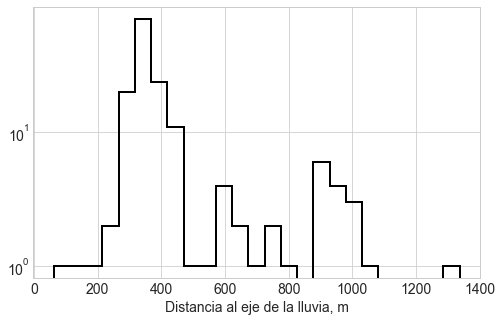

In [35]:
r=np.sqrt(ds_["x"]**2 + ds_["y"]**2)

plt.figure(figsize=(8,5))
plt.hist(r, bins=25, histtype='step', color="k", linewidth=2, fill=False);
#plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
pyplot.yscale('log')
#plt.title("Partículas de la lluvia")
plt.xlabel(r"Distancia al eje de la lluvia, m")
#plt.legend()
plt.show()

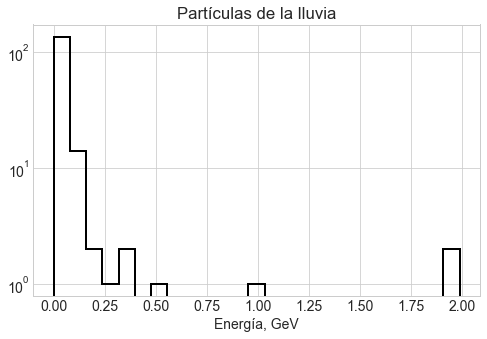

In [36]:
plt.figure(figsize=(8,5))
plt.hist(E10, bins=25, histtype='step', color="k", linewidth=2, fill=False);
#plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
pyplot.yscale('log')
plt.title("Partículas de la lluvia")
plt.xlabel(r"Energía, GeV")
#plt.legend()
plt.show()

In [37]:
np.sum(E10)

10.187033337968648

## Evento 2

In [286]:
ds = pd.read_csv(r"rbm_10-100GeV_G/110000.sec.bz2", compression='bz2', delimiter=" ")

/home/csarmiento/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,3,4,5,7,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [287]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222857 entries, 0 to 222856
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CorsikaId   222857 non-null  object 
 1   px          222857 non-null  object 
 2   py          222857 non-null  float64
 3   pz          222857 non-null  object 
 4   x           222857 non-null  object 
 5   y           222857 non-null  object 
 6   t           222857 non-null  float64
 7   shower_id   222857 non-null  object 
 8   prm_id      222857 non-null  object 
 9   prm_energy  222857 non-null  float64
 10  prm_theta   222857 non-null  object 
 11  prm_phi     222856 non-null  float64
dtypes: float64(4), object(8)
memory usage: 20.4+ MB


In [63]:
ds_ = ds[ds["shower_id"]==1371]
ds_.head()

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi
31743,1.0,0.000676,0.000109,0.000130,794.46800,-96.7187,371709.0,1371.0,1,13.4154,0,0.0
31744,1.0,-0.000220,-0.000111,0.001958,-181.12100,-74.1272,370624.0,1371.0,1,13.4154,0,0.0
31745,1.0,0.000381,0.011766,0.034777,53.66190,542.4280,370849.0,1371.0,1,13.4154,0,0.0
31746,1.0,-0.000147,0.000991,0.010816,-9.17298,178.2810,370603.0,1371.0,1,13.4154,0,0.0
31747,1.0,0.001077,-0.000273,0.001602,-34.98190,-30.6248,370834.0,1371.0,1,13.4154,0,0.0


In [64]:
E10 = np.sqrt(ds_["px"]**2 + ds_["py"]**2 + ds_["pz"]**2)

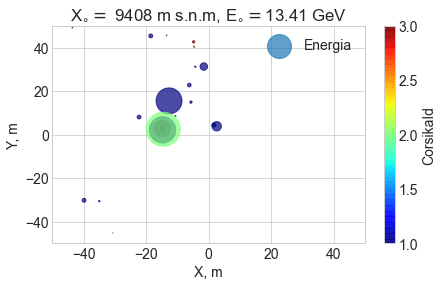

In [70]:
ds_.plot(kind="scatter", x="x", y="y", alpha=0.7,
    s=E10*1000, label="Energia", figsize=(7,4),
    c="CorsikaId", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

#plt.plot(ds_["x"], ds_["y"], '.')
plt.xlabel("X, m")
plt.ylabel("Y, m")
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.title(r"X$_{\circ}=$ 9408 m s.n.m, E$_{\circ}=$13.41 GeV")
plt.legend()

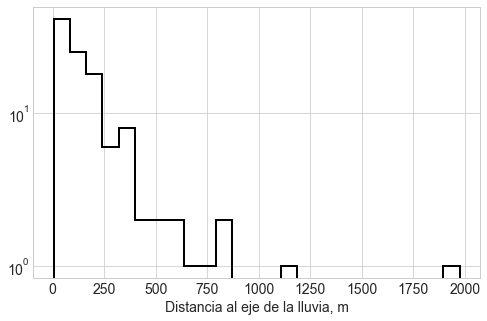

In [71]:
r=np.sqrt(ds_["x"]**2 + ds_["y"]**2)

plt.figure(figsize=(8,5))
plt.hist(r, bins=25, histtype='step', color="k", linewidth=2, fill=False);
#plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
pyplot.yscale('log')
#plt.title("Partículas de la lluvia")
plt.xlabel(r"Distancia al eje de la lluvia, m")
#plt.legend()
plt.show()

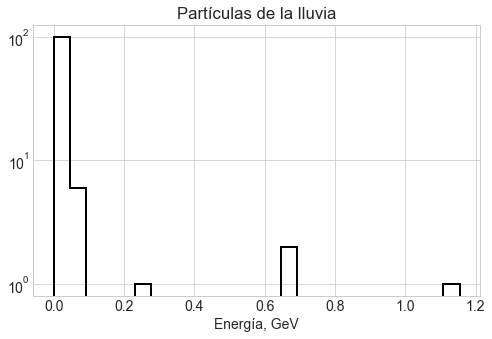

In [74]:
plt.figure(figsize=(8,5))
plt.hist(E10, bins=25, histtype='step', color="k", linewidth=2, fill=False);
#plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
pyplot.yscale('log')
plt.title("Partículas de la lluvia")
plt.xlabel(r"Energía, GeV")
#plt.legend()
plt.show()

In [73]:
np.sum(E10)

3.7702797209704113

In [285]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222857 entries, 0 to 222856
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CorsikaId   222857 non-null  object 
 1   px          222857 non-null  object 
 2   py          222857 non-null  float64
 3   pz          222857 non-null  object 
 4   x           222857 non-null  object 
 5   y           222857 non-null  object 
 6   t           222857 non-null  float64
 7   shower_id   222857 non-null  object 
 8   prm_id      222857 non-null  object 
 9   prm_energy  222857 non-null  float64
 10  prm_theta   222857 non-null  object 
 11  prm_phi     222856 non-null  float64
dtypes: float64(4), object(8)
memory usage: 20.4+ MB


In [77]:
ds["Eobs"] = np.sqrt(ds["px"]**2 + ds["py"]**2 + ds["pz"]**2)

In [78]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222857 entries, 0 to 222856
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CorsikaId   222856 non-null  float64
 1   px          222856 non-null  float64
 2   py          222857 non-null  float64
 3   pz          222856 non-null  float64
 4   x           222856 non-null  float64
 5   y           222856 non-null  float64
 6   t           222857 non-null  float64
 7   shower_id   222856 non-null  float64
 8   prm_id      222857 non-null  object 
 9   prm_energy  222857 non-null  float64
 10  prm_theta   222857 non-null  object 
 11  prm_phi     222856 non-null  float64
 12  Eobs        222856 non-null  float64
dtypes: float64(11), object(2)
memory usage: 22.1+ MB


(0.0, 10.0)

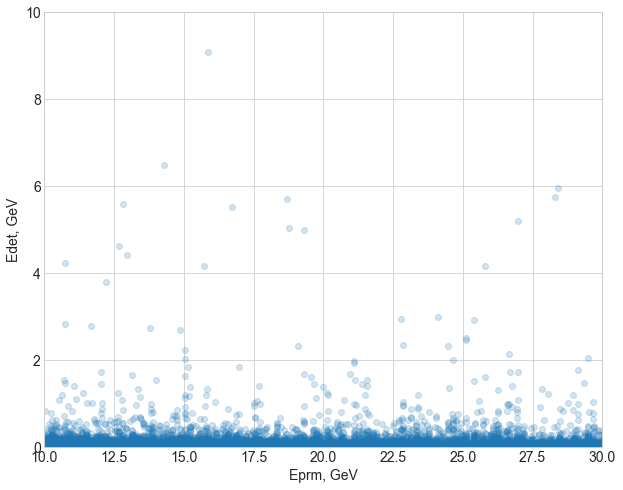

In [87]:
plt.figure(figsize=(10,8))
plt.plot(ds["prm_energy"], ds["Eobs"], 'o', alpha=0.2)
plt.xlabel("Eprm, GeV")
plt.ylabel("Edet, GeV")
plt.xlim(10,30)
plt.ylim(0,10)

(0.0, 10.0)

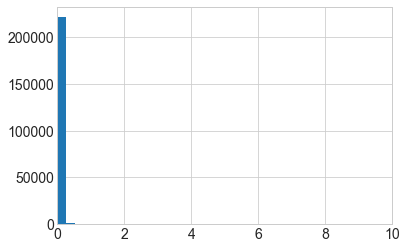

In [92]:
plt.hist(ds["Eobs"], bins=100);
plt.xlim(0,10)